# Лабораторна робота №1
## виконав 
## Жорник Данило 
## студент групи КН-223с


In [23]:
N = ord('D') % 3 + 1
print(N)

3


## Варіант 3

Завдання 1: Успішно завантажено стовпець 'APC'. Перших 5 значень: [17063 17043 17003 16955 16938]
Завдання 2: Масив значень стовпця 'APC'. Розмір масиву: 934
Завдання 3: Добові втрати БТР. Перших 5 значень: [-20 -40 -48 -17 -13]
Завдання 4: 5 найбільших добових втрат БТР: [ 0  0  0  0 14]
Завдання 5: БТР знищено влітку 2023 року: 739568
Завдання 6: Середнє значення знищених БТР за 100-500 днів війни: 10505.505
Завдання 7: Побудова графіку втрат БТР за останні 200 днів


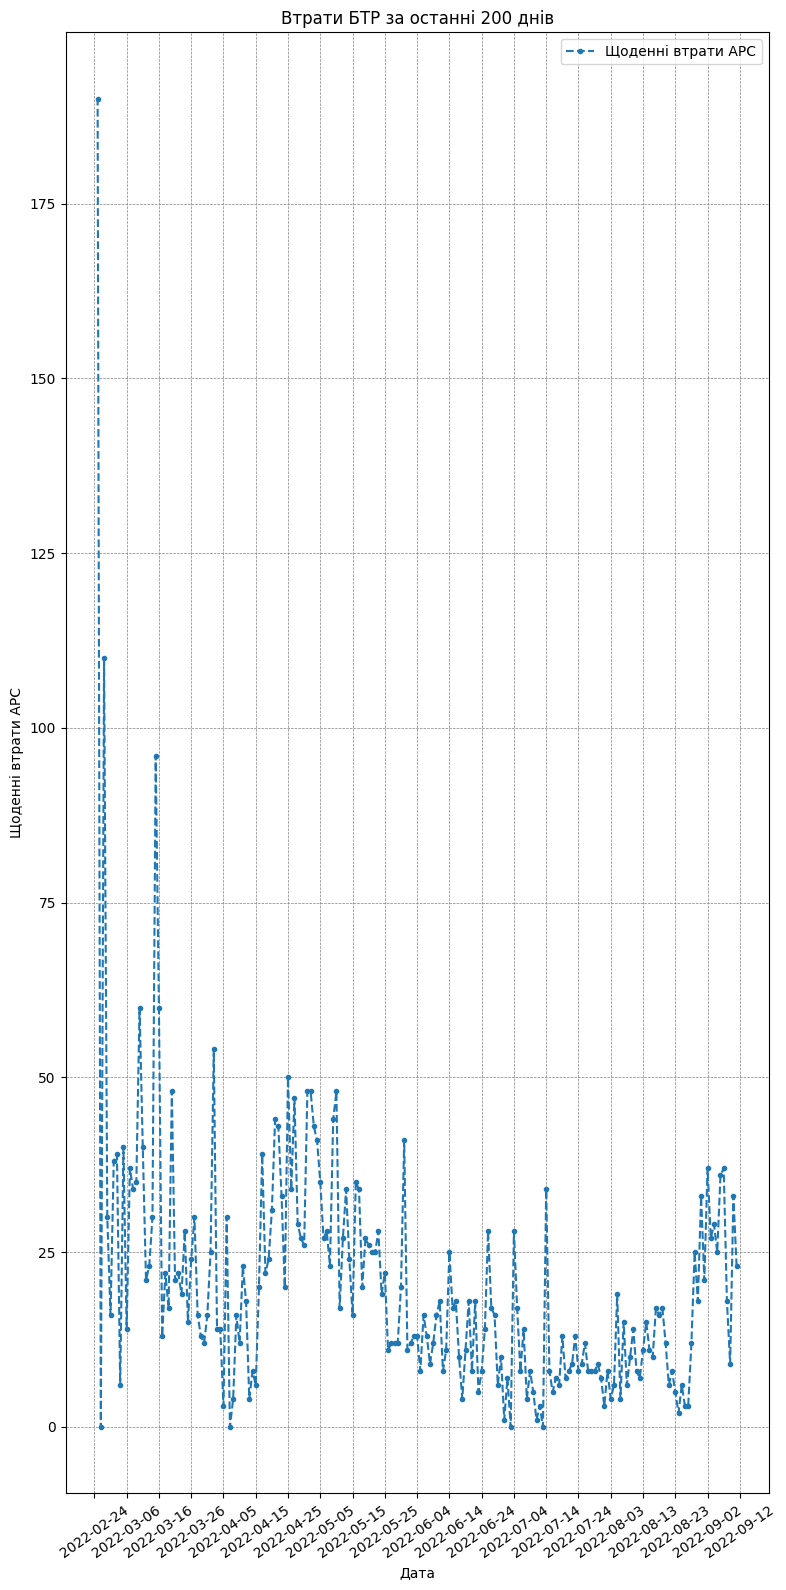

Графік збережено як 'apc_losses_last_200_days.png'


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Функція, яка приймає назву файлу та стовпця, і повертає масив numpy
def load_column_as_numpy(filename, column_name):
    data = pd.read_csv(filename)
    return data[column_name].values

# Тест для завдання 1: завантаження стовпця
apc_losses = load_column_as_numpy('russia_losses_equipment.csv', 'APC')
print(f"Завдання 1: Успішно завантажено стовпець 'APC'. Перших 5 значень: {apc_losses[:5]}")

# 2. Використання функції для створення масиву numpy зі значень стовпця «APC»
# Завдання 2 вже виконане в попередньому кроці. Перевіримо ще раз:
print(f"Завдання 2: Масив значень стовпця 'APC'. Розмір масиву: {apc_losses.size}")

# 3. Знайти добові втрати БТР (APC)
daily_losses_apc = np.diff(apc_losses)
print(f"Завдання 3: Добові втрати БТР. Перших 5 значень: {daily_losses_apc[:5]}")

# 4. Знайти 5 найбільших добових втрат БТР
top_5_losses = np.sort(daily_losses_apc)[-5:]
print(f"Завдання 4: 5 найбільших добових втрат БТР: {top_5_losses}")

# 5. Визначити, скільки БТР було знищено влітку 2023 року
def get_summer_2023_losses(filename, column_name):
    data = pd.read_csv(filename)
    data['date'] = pd.to_datetime(data['date'])
    summer_2023 = data[(data['date'] >= '2023-06-01') & (data['date'] <= '2023-08-31')]
    return np.sum(summer_2023[column_name].values)

summer_2023_losses = get_summer_2023_losses('russia_losses_equipment.csv', 'APC')
print(f"Завдання 5: БТР знищено влітку 2023 року: {summer_2023_losses}")

# 6. Знайти середнє значення знищених БТР за 100-500 днів війни
def get_avg_losses_between_days(filename, column_name, start_day, end_day):
    data = pd.read_csv(filename)
    return np.mean(data[column_name].values[start_day:end_day])

avg_losses_100_500_days = get_avg_losses_between_days('russia_losses_equipment.csv', 'APC', 100, 500)
print(f"Завдання 6: Середнє значення знищених БТР за 100-500 днів війни: {avg_losses_100_500_days}")

# 7. Функція для створення графіку втрат APC за останні 200 днів
def plot_apc_losses_last_200_days(filename, column_name='APC', date_column='date'):
    # Читання даних із файлу CSV
    data = pd.read_csv(filename)
    
    # Вибір останніх 200 днів
    last_200_days = data.tail(200)
    
    # Обчислення щоденних втрат APC
    daily_losses = np.diff(last_200_days[column_name].to_numpy()) * -1
    
    # Масив дат для осі X (відповідає щоденним втратам, тому використовуємо .iloc[1:] для синхронізації з diff)
    x_axis_dates = pd.to_datetime(last_200_days[date_column].iloc[1:])
    
    # Налаштування розміру графіку і його розподільчої здатності
    plt.figure(figsize=(8, 16), dpi=100)
    
    # Побудова графіку з маркерами та пунктирною лінією
    plt.plot(x_axis_dates, daily_losses, marker='o', markersize=3, linestyle='--', label='Щоденні втрати APC')
    
    # Додавання заголовка і підписів до осей
    plt.title('Втрати БТР за останні 200 днів')
    plt.xlabel('Дата')
    plt.ylabel('Щоденні втрати APC')
    
    # Додавання легенди
    plt.legend()
    
    # Додавання сітки із зазначеним кольором та типом ліній
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Поворот підписів осі X для зручності читання
    plt.xticks(rotation=35)
    
    # Налаштування осі X для відображення дат кожні 10 днів у форматі dd.mm.yy
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    
    # Налаштування відступів та збереження графіку у форматі PNG
    plt.tight_layout()
    plt.savefig('apc_losses_last_200_days.png', format='png')
    
    # Відображення графіку
    plt.show()
    print("Графік збережено як 'apc_losses_last_200_days.png'")

# Виклик функції для створення графіку
print(f"Завдання 7: Побудова графіку втрат БТР за останні 200 днів")
plot_apc_losses_last_200_days('russia_losses_equipment.csv')
